In [1]:
from __future__ import print_function
import steps.model as smodel
import steps.solver as ssolver
import steps.geom as swm
import steps.rng as srng
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as itp

from parameters import *
from misc import *
from components import *

### Loading vdcc_dat for given ISI

In [2]:
isi=20
loc="/home/kabir/Project/tripartiteSynapse/mcell"
VDCC_rates={
'VDCC_C01' : np.loadtxt(loc+"/vdcc_dat/VDCC_PQ_C01_" + str(isi) + "ms_ppf.dat"),
'VDCC_C12' : np.loadtxt(loc+"/vdcc_dat/VDCC_PQ_C12_" + str(isi) + "ms_ppf.dat"),
'VDCC_C23' : np.loadtxt(loc+"/vdcc_dat/VDCC_PQ_C23_" + str(isi) + "ms_ppf.dat"),
'VDCC_C3O' : np.loadtxt(loc+"/vdcc_dat/VDCC_PQ_C34_" + str(isi) + "ms_ppf.dat"),
'VDCC_OC3' : np.loadtxt(loc+"/vdcc_dat/VDCC_PQ_C43_" + str(isi) + "ms_ppf.dat"),
'VDCC_C32' : np.loadtxt(loc+"/vdcc_dat/VDCC_PQ_C32_" + str(isi) + "ms_ppf.dat"),
'VDCC_C21' : np.loadtxt(loc+"/vdcc_dat/VDCC_PQ_C21_" + str(isi) + "ms_ppf.dat"),
'VDCC_C10' : np.loadtxt(loc+"/vdcc_dat/VDCC_PQ_C10_" + str(isi) + "ms_ppf.dat"),
'VDCCflux'  : np.loadtxt(loc+"/vdcc_dat/VDCC_PQ_Ca_"  + str(isi) + "ms_ppf.dat")} 

#fitting cubic splines
VDCC_spline={}
for key in VDCC_rates.keys():
    VDCC_spline[key]=itp.interp1d(VDCC_rates[key].T[0],VDCC_rates[key].T[1],kind='previous',fill_value=(np.nan, VDCC_rates[key].T[1][-1]), bounds_error=False)

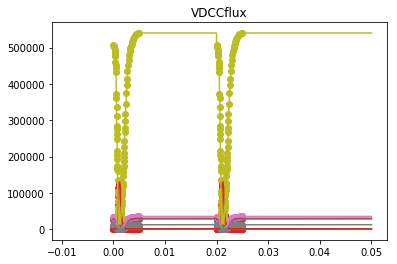

In [3]:
for key in VDCC_spline.keys():
    #plt.figure(figsize=(20,10))
    #VDCC_spline[key](0)
    plt.title(key)
    plt.scatter(VDCC_rates[key].T[0],VDCC_rates[key].T[1])
    x=np.linspace(0,0.050,10000)
    plt.plot(x,VDCC_spline[key](x))
    #float(itp.splev(1,VDCC_spline['VDCC_C3O'],der=0))

In [10]:
mParts = ['vdcc', 'pmca', 'cb', 'ryr']#,'az',]

mdl = smodel.Model()
cytvsys = smodel.Volsys('cytvsys', mdl)
cytssys = smodel.Surfsys('cytSurfsys', mdl)

ervsys = smodel.Volsys('ervsys', mdl)
erssys = smodel.Surfsys('erSurfsys', mdl)

Ca = smodel.Spec('Ca', mdl)

if 'cb'    in mParts: cbMol,    R_cb    = get_cb(cytvsys, mdl, Ca)
if 'pmca'  in mParts: pmcaMol,  R_PMCA  = get_PMCA(cytssys, mdl, Ca)
if 'vdcc'  in mParts: vdccMol,  R_VDCC  = get_VDCC(cytssys, mdl, Ca)
if 'az'    in mParts: azMol,    R_AZ    = get_AZ(cytssys, mdl, Ca)
if 'serca' in mParts: sercaMol, R_SERCA = get_SERCA(erssys, mdl, Ca)
if 'ryr'   in mParts: ryrMol,   R_RyR   = get_RyR(erssys, mdl, Ca)

In [11]:
wmgeom = swm.Geom()

# Create the cytosol compartment
cytVol = swm.Comp('cytVol', wmgeom, vol=cytVolVal) # cyt vol = 1 - ER vol = 0.961 um^3
cytVol.addVolsys('cytvsys')

# cyt is the 'inner' compartment, no outer compartment
cytSurf = swm.Patch('cytSurf', wmgeom, cytVol, area=cytArea) # cyt surf area = 8.5 um^2
cytSurf.addSurfsys('cytSurfsys')

# Create the Endoplasmic Reticulum compartment
erVol = swm.Comp('erVol', wmgeom, vol=erVolVal) # ER vol = 0.039 um^3
erVol.addVolsys('ervsys')

# # ER is the 'inner' compartment, cyt is the 'outer' compartment
erSurf = swm.Patch('erSurf', wmgeom, erVol, cytVol, area=erArea) # ER surf area = 1.58 um^2
erSurf.addSurfsys('erSurfsys')

print('Inner compartment to cytSurf is', erSurf.getIComp().getID())
print('Outer compartment to cytSurf  is', erSurf.getOComp().getID())

Inner compartment to cytSurf is erVol
Outer compartment to cytSurf  is cytVol


In [12]:
wmgeom = swm.Geom()

# Create the cytosol compartment
cytVol = swm.Comp('cytVol', wmgeom, vol=cytVolVal) # cyt vol = 1 - ER vol = 0.961 um^3
cytVol.addVolsys('cytvsys')

# cyt is the 'inner' compartment, no outer compartment
cytSurf = swm.Patch('cytSurf', wmgeom, cytVol, area=cytArea) # cyt surf area = 8.5 um^2
cytSurf.addSurfsys('cytSurfsys')

wmgeom = swm.Geom()

# Create the cytosol compartment
cytVol = swm.Comp('cytVol', wmgeom, vol=cytVolVal) # cyt vol = 1 - ER vol = 0.961 um^3
cytVol.addVolsys('cytvsys')

# cyt is the 'inner' compartment, no outer compartment
cytSurf = swm.Patch('cytSurf', wmgeom, cytVol, area=cytArea) # cyt surf area = 8.5 um^2
cytSurf.addSurfsys('cytSurfsys')

In [13]:
# Create the Endoplasmic Reticulum compartment
#erVol = swm.Comp('erVol', wmgeom, vol=erVolVal) # ER vol = 0.039 um^3
#erVol.addVolsys('ervsys')

# # ER is the 'inner' compartment, cyt is the 'outer' compartment
#erSurfVDCC_spline.keys() = swm.Patch('erSurf', wmgeom, erVol, cytVol, area=erArea) # ER surf area = 1.58 um^2
#erSurf.addSurfsys('erSurfsys')

#print('Inner compartment to cytSurf is', erSurf.getIComp().getID())
#print('Outer compartment to cytSurf  is', erSurf.getOComp().getID())

r = srng.create('mt19937', 256)
r.initialize(23411)

sim = ssolver.Wmdirect(mdl, wmgeom, r)
sim.reset()

r = srng.create('mt19937', 256)
r.initialize(23412)

sim = ssolver.Wmdirect(mdl, wmgeom, r)

#NITER = 100
#res = numpy.zeros([NITER, 2001, 3])


sim.reset()

### Simulation time
ti, tf, dt = 0.0, 50.0e-3, 1e-5
T = np.arange(ti, tf+dt, dt)
npts = len(T)

### Set initial conditions
sim.setCompConc('cytVol', 'Ca', 1e-7) #initV['Ca'][0])

if 'cb' in mParts: 
    for mol,ic in zip(cbMolName,initV['cb']):
        sim.setCompConc('cytVol', mol, ic)
    
if 'pmca' in mParts: 
    for mol,ic in zip(pmcaMolName,initV['PMCA']):
        num = round(ic*8.5)
        sim.setPatchCount('cytSurf', mol, num)
    
if 'vdcc' in mParts: 
    sim.setPatchCount('cytSurf', 'VDCC_C0', 80)

if 'az' in mParts: 
    sim.setPatchCount('cytSurf', 'AZ00', 7)
    
if 'ryr' in mParts: 
    sim.setPatchCount('erSurf', 'RyRLC1', 150)


### result container
resCa = np.zeros([npts])
if 'cb'   in mParts: rescb   = np.zeros([npts, len(cbMolName)])
if 'pmca' in mParts: resPMCA = np.zeros([npts, len(pmcaMolName)])
if 'vdcc' in mParts: resVDCC = np.zeros([npts, len(vdccMolName)])
if 'az'   in mParts: resAZ   = np.zeros([npts, len(azMolName)])
if 'ryr'  in mParts: resRyR  = np.zeros([npts, len(ryrMolName)])

Ti = time()
for t in range(npts):
    ##Updating VDCC rates
    #if t==int(npts/2):
    for key in R_VDCC.keys():
        sim.setPatchSReacK('cytSurf','R_'+key,float(VDCC_spline[key](T[t])))
            #R_VDCC[key].kcst=float(itp.splev(T[t],VDCC_spline[key],der=0))
            #R_VDCC['VDCC_C01'].setKcst(float(VDCC_spline['VDCC_C01'](T[t])))

            
    #if t==int(npts/2):
        #for key in R_VDCC.keys():
            #R_VDCC[key].kcst=float(itp.splev(T[t],VDCC_spline[key],der=0))
        #R_VDCC['VDCC_C01'].setKcst(float(VDCC_spline['VDCC_C01'](0.001)))
            
    #print(sim.getPatchSReacK('cytSurf','R_'+'VDCC_C01'))
    #sim.setPatchCount('cytSurf', 'VDCC_C0', 100+T[t]*50e3)
    sim.run(T[t])
    
    resCa[t] = sim.getCompCount('cytVol', 'Ca')
    
    if 'cb' in mParts: 
        for i,mol in enumerate(cbMolName):
            rescb[t,i] = sim.getCompCount('cytVol', mol)
        
    if 'pmca' in mParts: 
        for i,mol in enumerate(pmcaMolName):
            resPMCA[t,i] = sim.getPatchCount('cytSurf', mol)

    if 'vdcc' in mParts: 
        for i,mol in enumerate(vdccMolName):
            resVDCC[t,i] = sim.getPatchCount('cytSurf', mol)
    
    if 'az' in mParts: 
        for i,mol in enumerate(azMolName):
            resAZ[t,i] = sim.getPatchCount('cytSurf', mol)
            
    if 'ryr' in mParts: 
        for i,mol in enumerate(ryrMolName):
            resRyR[t,i] = sim.getPatchCount('erSurf', mol)
    
Tf = time()
print(Tf-Ti, 'sec')

RuntimeError: ArgErr: Geometry does not contain patch with string identifier 'erSurf'.

## Plots

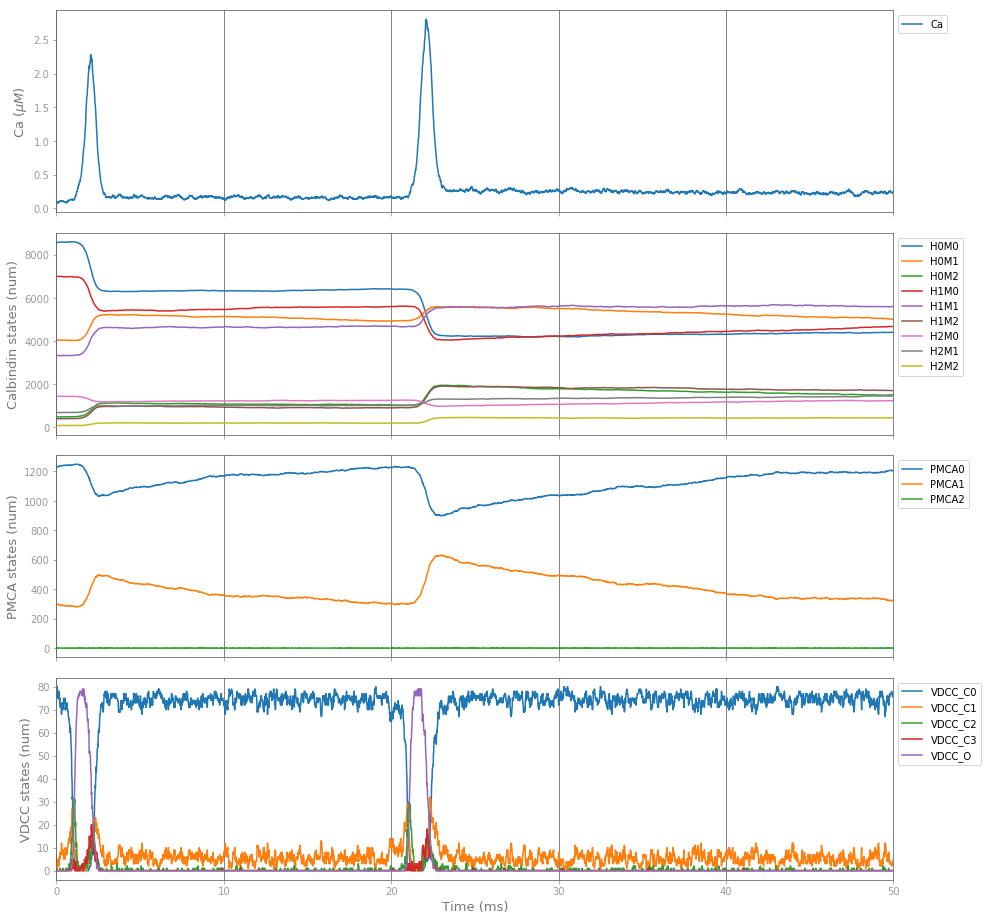

In [8]:
nFig = 1 + len(mParts)
figure, ax = plt.subplots(nFig, figsize=(15, 4*nFig), sharex=True)
figure.subplots_adjust(hspace=0.1)
labelfontsize = 13

time = T*1e3
j = 0
ax[j].plot(time, resCa/NA/cytVolVal*1e3, label='Ca')
ax[j].set_ylabel(r'Ca ($\mu M$)', fontsize=labelfontsize)

j += 1
if 'cb' in mParts: 
    for i,mol in enumerate(cbMolName):
        ax[j].plot(time, rescb[:,i], label=mol)
    ax[j].set_ylabel('Calbindin states (num)', fontsize=labelfontsize)
    j += 1

if 'pmca' in mParts:
    for i,mol in enumerate(pmcaMolName):
        ax[j].plot(time, resPMCA[:,i], label=mol)
    ax[j].set_ylabel('PMCA states (num)', fontsize=labelfontsize)
    j += 1

if 'vdcc' in mParts: 
    for i,mol in enumerate(vdccMolName):
        ax[j].plot(time, resVDCC[:,i], label=mol)
    ax[j].set_ylabel('VDCC states (num)', fontsize=labelfontsize)
    j += 1

if 'az' in mParts:
    for mol in [azMolName[i] for i in [0,5,11,12,13,14,15,16,17]]:
        i = azMolName.index(mol)
        ax[j].plot(time, resAZ[:,i], label=mol)
    ax[j].set_ylabel('AZ states (num)', fontsize=labelfontsize)
    j += 1
    
if 'ryr' in mParts:
    for i,mol in enumerate(ryrMolName):
        ax[j].plot(time, resRyR[:,i], label=mol)
    ax[j].set_ylabel('RyR states (num)', fontsize=labelfontsize)
    j += 1

ax[-1].set_xlabel('Time (ms)', fontsize=labelfontsize)

facecol = '#ffffff11'
labelcol = '#777777'
tickcol = '#999999'
spinecol = '#666666'
for x in ax:
    x.legend(loc='upper left', facecolor='white', framealpha=0.8, bbox_to_anchor=(1,1))
    
    x.set_xlim(min(time), max(time))
    
    x.spines['bottom'].set_color(spinecol)
    x.spines['top'].set_color(spinecol)
    x.spines['right'].set_color(spinecol)
    x.spines['left'].set_color(spinecol)
    
    x.xaxis.label.set_color(labelcol)
    x.yaxis.label.set_color(labelcol)
    
    x.tick_params(axis='x', colors=tickcol)
    x.tick_params(axis='y', colors=tickcol)
    
    x.set_facecolor(facecol)#'xkcd:salmon')
    
    x.grid(axis='x', color=spinecol)
    
#plt.savefig('test.eps', dpi=300, format='eps', transparent=True, bbox_inches=None, pad_inches=0.1)
#plt.show()

In [9]:
help(sim.getPatchSReacK)

Help on built-in function getPatchSReacK:

getPatchSReacK(...) method of steps.solver.Wmdirect instance
    Returns the macroscopic reaction constant of surface reaction with identifier 
    string sreac in patch with identifier string pat. The unit of the reaction constant 
    depends on the order of the reaction.
    
    Note: In a mesh-based solver the value for the patch is returned, 
    although individual triangle elements may have different values 
    (set with setTriSReacK).
    
    Syntax::
        
        getPatchSReacK(pat, reac)
        
    Arguments:
    string pat
    string reac
    
    Return:
    float

